### Instructions
1. Open the categoricals variable we created before.
2. categoricals = data.select_dtypes(np.object)
3. categoricals.head()
4. Plot all the categorical variables with the proper plot. What can you see?
5. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
6. Plot time variable. Can you extract something from it?

In [39]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)


In [41]:
customer_df = pd.read_csv("C:/Users/jw156/Ironhack/Day16/Afternoon/lab/secondlab")

#### 1. Open the categoricals variable we created before.


In [42]:
categorical_data = customer_df.select_dtypes(include=np.object)

In [43]:
numerical_data = customer_df.select_dtypes(include=np.number)

#### 2. categoricals = data.select_dtypes(np.object)


In [44]:
categorical_data = pd.DataFrame(customer_df[categorical_data.columns])

#### 3. categoricals.head()

In [47]:
categorical_data = categorical_data.drop(['customer'], axis=1)

In [48]:
categorical_data.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal,Agent,Four-Door Car,Medsize


####  Plot all the categorical variables with the proper plot. What can you see?

In [49]:
def plot_cats(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df).set_title('Distribution of {}'.format(i))


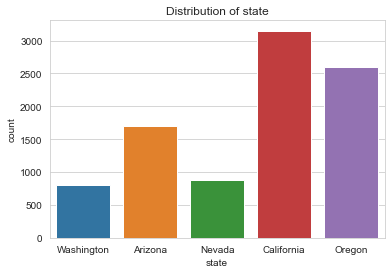

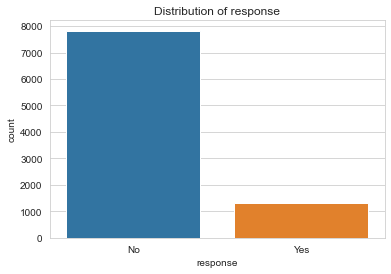

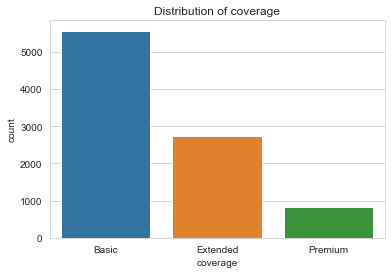

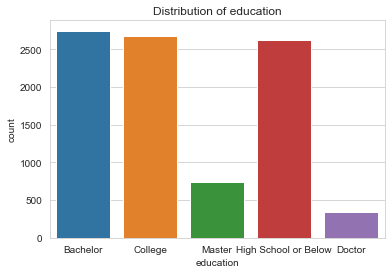

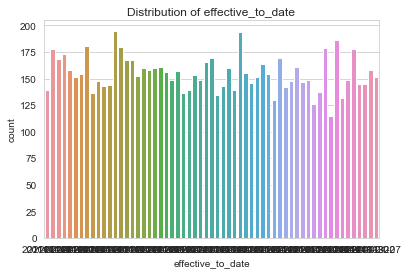

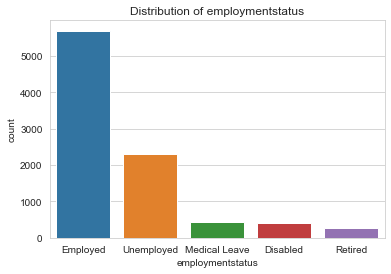

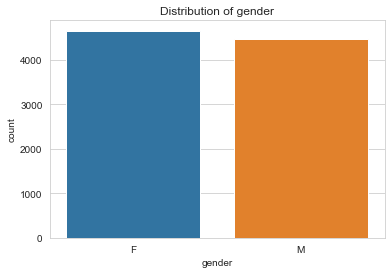

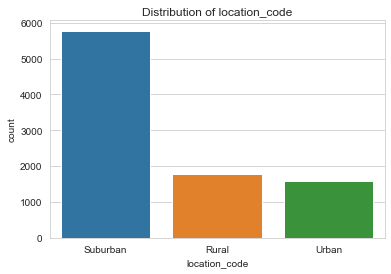

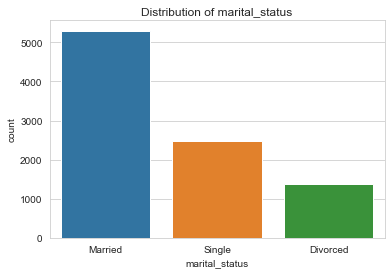

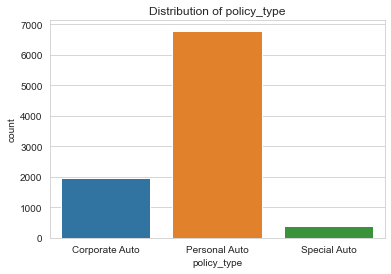

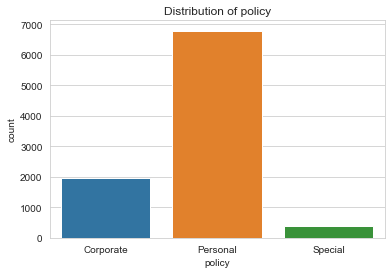

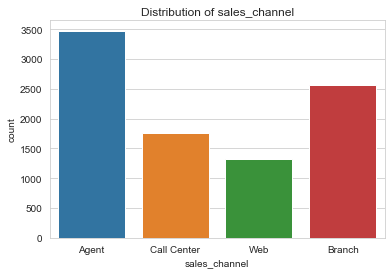

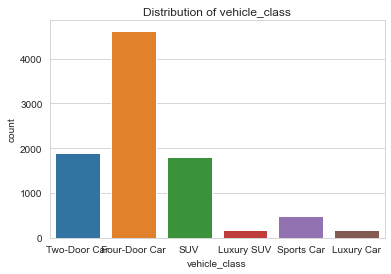

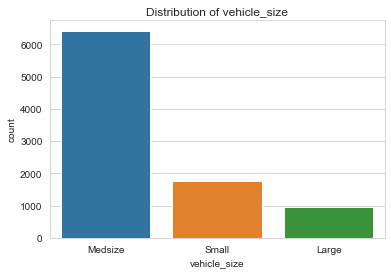

In [50]:
plot_cats(categorical_data)

#### 5. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [14]:
import re



def clean_words(x):
    pattern = '^\S*'
    if re.search(pattern, x):
        pos = re.search(pattern, x).end()
        return x[:pos]
    else:
        x = wrong
        return 'other'

In [16]:
def employment(x):
    if 'mployed' not in x:
        return 'Other'
    else:
        return x

In [17]:
employment('Unemployed')

'Unemployed'

In [18]:
def car(x):
    if 'Luxury' in x or 'Sports ' in x:
        return 'Other'
    else:
        return x

In [20]:
customer_df['vehicle_class'] = customer_df['vehicle_class'].apply(car)

In [21]:
# vals = pd.DataFrame(df_cat['vehicle_class'].value_counts())
# vals = vals.reset_index()
# vals.columns = ['vehicle_class', 'counts']
# group_vehicles_df = vals[vals['counts']<1000]
# group_vehicles = list(group_vehicles_df['vehicle_class'])
# group_vehicles

# def clean_vehicles(x):
#     if x in group_vehicles:
#         return 'Luxury'
#     else:
#         return x

# df_cat['vehicle_class'] = df_cat['vehicle_class'].apply(clean_vehicles)


In [23]:
customer_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Other'], dtype=object)

In [24]:
customer_df['employmentstatus'] = customer_df['employmentstatus'].apply(employment)

In [25]:
customer_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Other'], dtype=object)

#### 6. Plot time variable. Can you extract something from it?

In [33]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

<AxesSubplot:>

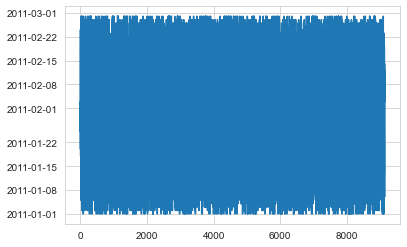

In [29]:
# df.Time = df.Time.dt.time
categorical_data['effective_to_date'].plot()

<function matplotlib.pyplot.show(close=None, block=None)>

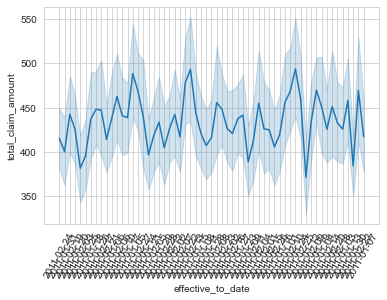

In [31]:
sns.lineplot(data=customer_df, x="effective_to_date", y="total_claim_amount")
plt.xticks(rotation=60)
plt.show

In [34]:
customer_df.to_csv('third_lab', index=False)